### Analysis of Deleted and Removed Comments regarding Sexual Misconduct in r/singapore 


### Author(s)
Harold Teng (@haroldteng)

Ang Yao Ting (@babiang)

Lee Wing Ho (@Winghoo)

Manish Dhanetwal (@ManishDhanetwal)

(Class: Pick the class that you're attending)

from class Sat 3.45pm

### Executive Summary

The recent Saga of peeping incidents in Universities have sparked a great debate in r/singapore, often resulting in netizens participating in witchhunts and toxic internet behaviours. It is during this period where there was a great surge in discussion in the subreddit. Moderators of the subreddit actively try to prevent the spread of toxicity by removing these comments. 

The idea to extract the removed data was inspired through "/r/science popular coment removal" by areeves87. (https://www.kaggle.com/areeves87/rscience-popular-comment-removal). Through scrapping reddit and removeddit, we are able to retrieve removed and deleted comments from April 2019 to June 2019, and to analysise their characteristics.

Dataset Characterstics

-  Score : Refers to the Overall score to a comment ,                  Positive score indicating a overall positive                score and vice-versa.
-  Content : Actual content written by the reddit user
-  ID : Used to identify the comment 
-  Thread Name : The title of post 
-  Status : To indicate weather the comment was removed by               the Moderators or deleted by the user.
-  Date : Time of comment

### Research Topic & Hypothesis
We will be studying all the user comments made on reddit with threads relating to "Sexual Miscounduct" in r/singapore. We will be studying which comments are removed from the posts to maintain the negativity on these controversial topics. We also study which kind of comments users decide to delete on their own accord. 


### Step 1 : Using pushshift.io API to retrieve list of main threads regarding Sexual Misconduct in r/Singapore



In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import re
import seaborn as sns
import nltk
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import seaborn as sns

%matplotlib inline

from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

In [2]:
#Reading json from pushshift API based on keyword: Peeping
with open("testfile.json", "r") as read_file:
    data = json.load(read_file)

In [3]:
#25 threads of 'peeping cases'
print(len(data['data']))

25


In [4]:
timestamp = []
timestampfinal = []
leng = len(data['data'])

#append the timestamp of peeping cases to LIST: timestamp
for x in range(0,leng):
    timestamp.append(data['data'][x]['created_utc'])

    
print(timestamp)  


peeping_df = pd.DataFrame()

[1555846030, 1555889965, 1555927033, 1555941761, 1556005477, 1556006138, 1556007230, 1556008294, 1556029502, 1556049952, 1556100586, 1556154385, 1556245682, 1556257042, 1556279004, 1556303854, 1556357774, 1556599621, 1556768717, 1557107587, 1557122915, 1557576664, 1557585439, 1557590691, 1557705686]


In [5]:
reddit_list = []
parent_id = []
thread_list = []

#append the link, id and title of peeping threads to the lists
for x in range(0,leng):
    reddit_list.append(data['data'][x]['full_link'])
    parent_id.append(data['data'][x]['id'])
    thread_list.append(data['data'][x]['title'])
    


In [6]:
#Reading json from pushshift API based on keyword: Sexual Misconduct
with open("peepingcases.json", "r") as read_file:
    data_test = json.load(read_file)

In [7]:
#40 threads for sexual misconduct cases
print(len(data_test['data']))

40


In [8]:
#length of sexual misconduct cases
lengtest = len(data_test['data'])

#timestamp list already contains timestamp of peeping cases done in previous cell
#append somemore timestamp taken from the sexual misconduct cases to the timestamp list created before
for x in range(0,lengtest):
    timestamp.append(data_test['data'][x]['created_utc'])

#convert the timestamp collected from peeping and sexual misconduct threads to MMDDYYYY, HMS
for y in timestamp:
    timestampfinal.append(time.strftime('%Y/%m/%d',  time.gmtime(y)))

#prints out all the timestamp collected for peeping and sexual misconduct cases
print(timestamp)  
print(timestampfinal)



[1555846030, 1555889965, 1555927033, 1555941761, 1556005477, 1556006138, 1556007230, 1556008294, 1556029502, 1556049952, 1556100586, 1556154385, 1556245682, 1556257042, 1556279004, 1556303854, 1556357774, 1556599621, 1556768717, 1557107587, 1557122915, 1557576664, 1557585439, 1557590691, 1557705686, 1560140611, 1557887006, 1557187828, 1557126452, 1557125267, 1556680210, 1556416610, 1556238879, 1556197837, 1556153561, 1556114574, 1556024886, 1555939977, 1555909256, 1555831828, 1555677052, 1555820776, 1555849497, 1555849649, 1555849685, 1555863649, 1555990976, 1556002361, 1556002496, 1556008521, 1556011274, 1556018027, 1556033038, 1556064188, 1556087515, 1556187238, 1556238588, 1556238686, 1556238817, 1556253943, 1556276664, 1556283424, 1556286086, 1556309990, 1556311534]
['2019/04/21', '2019/04/21', '2019/04/22', '2019/04/22', '2019/04/23', '2019/04/23', '2019/04/23', '2019/04/23', '2019/04/23', '2019/04/23', '2019/04/24', '2019/04/25', '2019/04/26', '2019/04/26', '2019/04/26', '2019/04

### Step 2: Converting reddit URLs into removeddit URLs and storing list of threads into peeping_df.

Removeddit is a site for viewing removed comments / threads from Reddit. Just go to any reddit thread and change the reddit in the URL to removeddit to see all removed comments. Credits: Jesper Wrang (https://github.com/JubbeArt/removeddit) 

In [9]:
# reddit_list 
# parent_id 
# thread_list 

#adding sexual misconduct threads to the list that has been created before 
for x in range(0,lengtest):
    reddit_list.append(data_test['data'][x]['full_link'])
    parent_id.append(data_test['data'][x]['id'])
    thread_list.append(data_test['data'][x]['title'])
    


remove_url =[]

#replaces all URL in reddit_list with the new URL
for url in reddit_list:
    remove_url.append(url.replace('www.reddit.com','www.removeddit.com'))

    
print(remove_url)
print(parent_id)

#push the different list of information to the dataframe called peeping_df
#an empty peeping_df is already created previously in the previous cell 
peeping_df['Timeframe'] = timestampfinal
peeping_df['URL'] = reddit_list
peeping_df['remove_URL'] = remove_url
peeping_df['ID'] = parent_id
peeping_df['Thread Name'] = thread_list




#shows the information of peeping and sexual misconduct threads
display(peeping_df)

['https://www.removeddit.com/r/singapore/comments/bfnv33/nus_students_union_condemns_sexual_harassment/', 'https://www.removeddit.com/r/singapore/comments/bfv7pb/company_cuts_off_ties_with_nus_students_express/', 'https://www.removeddit.com/r/singapore/comments/bg0995/great_eastern_places_nus_peeping_tom_on_immediate/', 'https://www.removeddit.com/r/singapore/comments/bg2ge8/peeping_tom_case_penalties_by_nus_manifestly/', 'https://www.removeddit.com/r/singapore/comments/bgdmcp/confession_i_dont_want_to_end_up_a_peeping_tom/', 'https://www.removeddit.com/r/singapore/comments/bgdp50/spf_statement_nus_peeping_tom_given_conditional/', 'https://www.removeddit.com/r/singapore/comments/bgdtni/httpswwwtnpsgnewssingaporenuspeepingtomcasevictims/', 'https://www.removeddit.com/r/singapore/comments/bgdxyg/nus_peeping_tom_case_victims_action_may_come/', 'https://www.removeddit.com/r/singapore/comments/bggzh6/kim_huat_and_the_peeping_tom/', 'https://www.removeddit.com/r/singapore/comments/bgl03r/nus

,Timeframe,URL,remove_URL,ID,Thread Name
0,2019/04/21,https://www.reddit.com/r/singapore/comments/bf...,https://www.removeddit.com/r/singapore/comment...,bfnv33,NUS students’ union condemns sexual harassment...
1,2019/04/21,https://www.reddit.com/r/singapore/comments/bf...,https://www.removeddit.com/r/singapore/comment...,bfv7pb,"Company cuts off ties with NUS, students expre..."
2,2019/04/22,https://www.reddit.com/r/singapore/comments/bg...,https://www.removeddit.com/r/singapore/comment...,bg0995,Great Eastern places NUS peeping tom on immedi...
3,2019/04/22,https://www.reddit.com/r/singapore/comments/bg...,https://www.removeddit.com/r/singapore/comment...,bg2ge8,Peeping tom case: Penalties by NUS ‘manifestly...
4,2019/04/23,https://www.reddit.com/r/singapore/comments/bg...,https://www.removeddit.com/r/singapore/comment...,bgdmcp,[Confession] I don't want to end up a peeping ...
5,2019/04/23,https://www.reddit.com/r/singapore/comments/bg...,https://www.removeddit.com/r/singapore/comment...,bgdp50,[SPF Statement] NUS peeping Tom given conditio...
6,2019/04/23,https://www.reddit.com/r/singapore/comments/bg...,https://www.removeddit.com/r/singapore/comment...,bgdtni,https://www.tnp.sg/news/singapore/nus-peeping-...
7,2019/04/23,https://www.reddit.com/r/singapore/comments/bg...,https://www.removeddit.com/r/singapore/comment...,bgdxyg,NUS peeping tom case: Victim's action may come...
8,2019/04/23,https://www.reddit.com/r/singapore/comments/bg...,https://www.removeddit.com/r/singapore/comment...,bggzh6,Kim Huat and the Peeping Tom
9,2019/04/23,https://www.reddit.com/r/singapore/comments/bg...,https://www.removeddit.com/r/singapore/comment...,bgl03r,NUS peeping tom case: Victim's action may come...


In [10]:
peeping_df.to_csv('DayTimeFrame.csv', index = False, sep='#')

In [11]:
#checking to make sure all list have the same number of index before creating dataframe
print(len(reddit_list))
print(len(parent_id))
print(len(thread_list))
print(len(timestampfinal))
print(len(remove_url))

65
65
65
65
65


### Step 3: Extracting all removed and deleted comments from removeddit using selenium and BeautifulSoup

Doing a simple webscrap of removeddit through BeautifulSoup does not allow us to retrieve the deleted and removed comments as they are generated by a javascript in the website. We need to use selenium which will run the javascripts of each webpage for us to extract the elements. 

In [12]:
class AnyEC:
    """ Use with WebDriverWait to combine expected_conditions
        in an OR.
    """
    def __init__(self, *args):
        self.ecs = args
    def __call__(self, driver):
        for fn in self.ecs:
            try:
                if fn(driver): return True
            except:
                pass
            
master_df = pd.DataFrame( )

master_df['Score'] = []
master_df['Content'] = []
master_df['ID'] = []
master_df['Thread Name'] = []
master_df['Status'] = []
master_df['Date'] = []


## Do a for loop for each thread in peeping_df
for i in range(0,leng+lengtest):
    url = peeping_df.iloc[i]["remove_URL"]
    driver = webdriver.Chrome()
    driver.get(url)
    delay = 20 

## This code asks the program to wait until a deleted comment or removed comment is loadded + a slight delay

    try:
        myElem = WebDriverWait(driver, delay).until(
            AnyEC(
                EC.presence_of_element_located((By.XPATH, "//div[@class = 'comment deleted']")),
                EC.presence_of_element_located((By.XPATH, "//div[@class = 'comment removed']"))
            ))
        print("Passed: ",url)
    except TimeoutException:
        print("Failed: ",url) #Fail due to timeout or no deleted/removed comments in main thread
        


    soup = BeautifulSoup(driver.page_source, 'lxml')
    driver.quit()

    p_tag = soup.find_all('div', {'class':'comment removed'})
    status = 'Removed'
    textlist = []
    scorelist = []
    for tag in p_tag:
        textlist.append(tag.find("p").text)
        scorelist.append(tag.find('span',{'class':'comment-score'}).text.split(" ")[0]) 



    text_df = pd.DataFrame()
    text_df['Score'] = scorelist
    text_df['Content'] = textlist
    text_df['ID'] = peeping_df.iloc[i]["ID"]

    text_df['Thread Name'] = thread_list[i]
    text_df['Status'] = status
    text_df['Date'] = timestampfinal[i]



    master_df = pd.concat([master_df,text_df], ignore_index=True)



    p_tag = soup.find_all('div', {'class':'comment deleted'})
    status = 'Deleted'
    textlist = []
    scorelist = []
    for tag in p_tag:
        textlist.append(tag.find("p").text)
        scorelist.append(tag.find('span',{'class':'comment-score'}).text.split(" ")[0]) 



    text_df = pd.DataFrame()
    text_df['Score'] = scorelist
    text_df['Content'] = textlist
    text_df['ID'] = peeping_df.iloc[i]["ID"]

    text_df['Thread Name'] = thread_list[i]
    text_df['Status'] = status
    text_df['Date'] = timestampfinal[i]


    master_df = pd.concat([master_df,text_df], ignore_index=True)
    



Passed:  https://www.removeddit.com/r/singapore/comments/bfnv33/nus_students_union_condemns_sexual_harassment/
Failed:  https://www.removeddit.com/r/singapore/comments/bfv7pb/company_cuts_off_ties_with_nus_students_express/
Passed:  https://www.removeddit.com/r/singapore/comments/bg0995/great_eastern_places_nus_peeping_tom_on_immediate/
Failed:  https://www.removeddit.com/r/singapore/comments/bg2ge8/peeping_tom_case_penalties_by_nus_manifestly/
Failed:  https://www.removeddit.com/r/singapore/comments/bgdmcp/confession_i_dont_want_to_end_up_a_peeping_tom/
Passed:  https://www.removeddit.com/r/singapore/comments/bgdp50/spf_statement_nus_peeping_tom_given_conditional/
Failed:  https://www.removeddit.com/r/singapore/comments/bgdtni/httpswwwtnpsgnewssingaporenuspeepingtomcasevictims/
Passed:  https://www.removeddit.com/r/singapore/comments/bgdxyg/nus_peeping_tom_case_victims_action_may_come/
Failed:  https://www.removeddit.com/r/singapore/comments/bggzh6/kim_huat_and_the_peeping_tom/
Failed

In [13]:
## List of all removed / deleted comments regarding Sexual Misconduct

display(master_df)

,Score,Content,ID,Thread Name,Status,Date
0,1,[removed too quickly to be archived],bfnv33,NUS students’ union condemns sexual harassment...,Removed,2019/04/21
1,1,And networkers. Lick the right boots.,bfnv33,NUS students’ union condemns sexual harassment...,Deleted,2019/04/21
2,1,[removed too quickly to be archived],bg0995,Great Eastern places NUS peeping tom on immedi...,Removed,2019/04/22
3,1,[removed too quickly to be archived],bg0995,Great Eastern places NUS peeping tom on immedi...,Removed,2019/04/22
4,1,how do you ever rehabilitate criminals with th...,bg0995,Great Eastern places NUS peeping tom on immedi...,Deleted,2019/04/22
5,4,"The victim can mount a private prosecution, st...",bg0995,Great Eastern places NUS peeping tom on immedi...,Deleted,2019/04/22
6,1,oh and unpopular opinion but this is why i als...,bg0995,Great Eastern places NUS peeping tom on immedi...,Deleted,2019/04/22
7,1,They can decide not to prosecute for many reas...,bg0995,Great Eastern places NUS peeping tom on immedi...,Deleted,2019/04/22
8,1,"Well, the police statement is out already. No ...",bg0995,Great Eastern places NUS peeping tom on immedi...,Deleted,2019/04/22
9,1,The video was reportedly found on his phone. I...,bg0995,Great Eastern places NUS peeping tom on immedi...,Deleted,2019/04/22


In [14]:
master_df.to_csv('SexualMisconduct.csv', index = False, sep='#')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

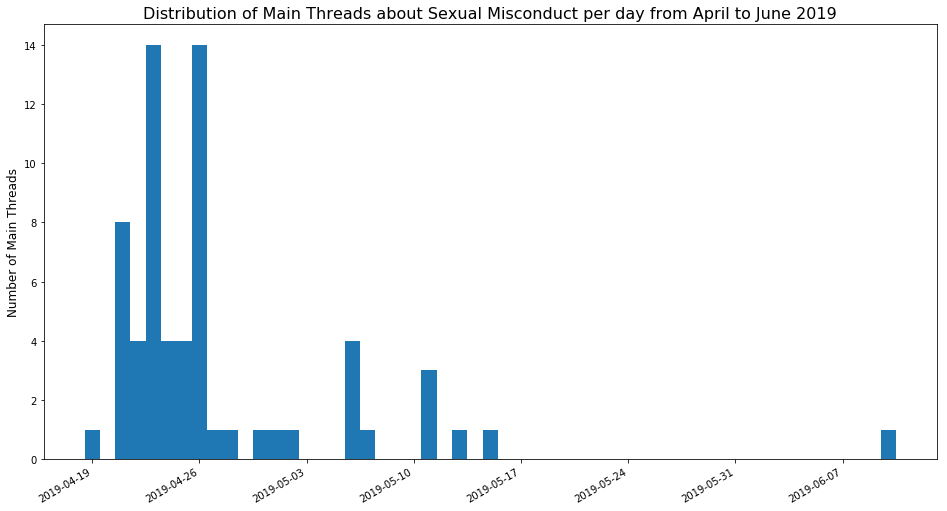

In [15]:
#reading list of main threads into timeframe_df
timeframe_df = pd.read_csv("DayTimeFrame.csv", sep = '#')


#Changing datatype into datetime which will be used to plot dates
timeframe_df['Timeframe'] = pd.to_datetime(timeframe_df['Timeframe'])

#plotting distribution of main threads...
graph_df = timeframe_df.groupby("Timeframe").size()
graph_df = graph_df.reset_index(name = "Count")
graph_df.head()


fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(111)

ax1.xaxis_date()
ax1.set_ylabel("Number of Main Threads",fontsize= 12)
ax1.set_title("Distribution of Main Threads about Sexual Misconduct per day from April to June 2019",fontsize = 16)
ax1.bar(graph_df["Timeframe"],graph_df["Count"],width = 1)


plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')

#### Discussion and Conclusion:
When the Nus case surface to public around 20th april, there is a massive peak in number of threads relating to "Sexual Misconduct" . As evident from the Graph, the majority of the threads were created around that time span. The heat associated with issue dies down as the number of threads relating to the  issue continue to shrink after 29/04.

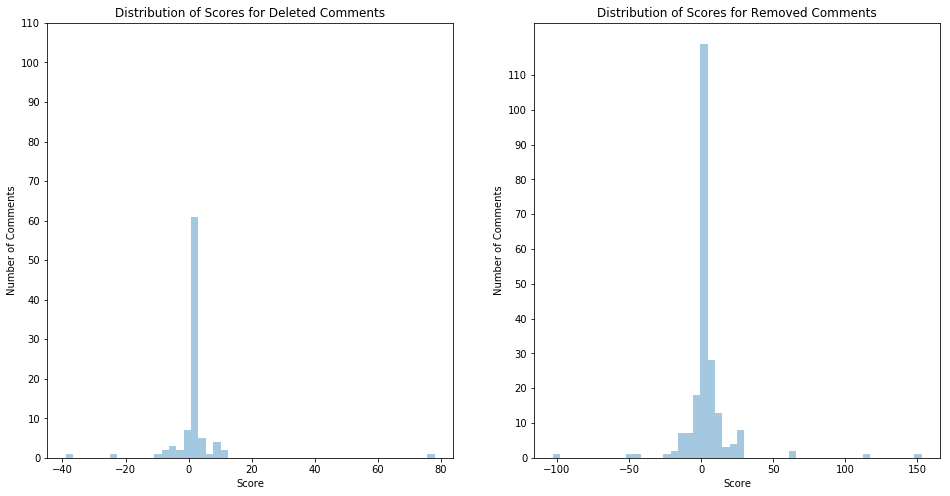

In [16]:
score_df = pd.read_csv("SexualMisconduct.csv",sep = '#')
remove_score_df = score_df[score_df["Status"] == "Removed"]
delete_score_df = score_df[score_df["Status"] == "Deleted"]
fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(remove_score_df["Score"],kde = False, ax = ax1, bins = 50)
sns.distplot(delete_score_df["Score"],kde = False, ax = ax2, bins = 50)

ax1.set_ylabel("Number of Comments")
ax1.set_title("Distribution of Scores for Deleted Comments")
ax1.set_yticks(np.arange(0,120,10))

ax2.set_ylabel("Number of Comments")
ax2.set_title("Distribution of Scores for Removed Comments")
ax2.set_yticks(np.arange(0,120,10))

#### Conclusion :
The results are contradicting to the expected behaviour where comments with negative score would be removed by the moderators and users. However, as seen on both graphs, positively marked comments are also removed by both users and moderators, giving it a normal distribution curve.
0 score being the mode because most comments get very little traction or rather they are removed before they can receive any votes.

In [17]:
peep_df = pd.read_csv('SexualMisconduct.csv', sep='#')
# Sample 3 of the records
peep_df.sample(3)

,Score,Content,ID,Thread Name,Status,Date
218,1,[removed too quickly to be archived],bgbm2u,[Unpopular opinion] about the recent saga of M...,Removed,2019/04/23
43,23,All is well and good until one day a wrong per...,bh2jiy,NUS peeping tom case becoming example of ‘tria...,Deleted,2019/04/25
12,13,you can work part time as an insurance agent w...,bg0995,Great Eastern places NUS peeping tom on immedi...,Deleted,2019/04/22


In [18]:
#getting two separate versions of the reddit comments, deleted and removed
content_deleted = peep_df[peep_df['Status'] == 'Deleted']
content_removed = peep_df[peep_df['Status'] == 'Removed']
print(content_deleted.head())
print()
print(content_removed.head())

   Score                                            Content      ID  \
1      1              And networkers. Lick the right boots.  bfnv33   
4      1  how do you ever rehabilitate criminals with th...  bg0995   
5      4  The victim can mount a private prosecution, st...  bg0995   
6      1  oh and unpopular opinion but this is why i als...  bg0995   
7      1  They can decide not to prosecute for many reas...  bg0995   

                                         Thread Name   Status        Date  
1  NUS students’ union condemns sexual harassment...  Deleted  2019/04/21  
4  Great Eastern places NUS peeping tom on immedi...  Deleted  2019/04/22  
5  Great Eastern places NUS peeping tom on immedi...  Deleted  2019/04/22  
6  Great Eastern places NUS peeping tom on immedi...  Deleted  2019/04/22  
7  Great Eastern places NUS peeping tom on immedi...  Deleted  2019/04/22  

    Score                               Content      ID  \
0       1  [removed too quickly to be archived]  bfnv33  

In [19]:
#converting them to a list
content_deleted_list = content_deleted['Content'].tolist()
content_removed_list = content_removed['Content'].tolist()

# print(content_deleted_list)
# print()
# print(content_removed_list)

In [20]:
#cleaning the data
content_deleted_step1 = []
for d in content_deleted_list:
    if 'removed too quickly to be archived' in d:
        content_deleted_list.remove('[removed too quickly to be archived]')
    else:
        content_deleted_step1.append(d)
        
content_removed_step1 = []
for d in content_removed_list:
    if 'removed too quickly to be archived' in d:
        content_removed_list.remove('[removed too quickly to be archived]')
    else:
        content_removed_step1.append(d)

        
# print(content_deleted_step1)
# print()
# print(content_removed_step1)

In [21]:
#further cleaning of the data, removing punctuations and emojis
content_deleted_step2 = []
for d in content_deleted_step1:  
    # Remove special characters
    d2 = re.sub('[-_,$&!.;%+/?)(>''°ʖ°😐]', '', d)
    d2 = re.sub(r'^https?:\/\/.*[\r\n]*', '', d2, flags=re.MULTILINE)
    d2 = re.sub(r'^https?:.*[\r\n]*', '', d2, flags=re.MULTILINE)
    # Convert to lower case, remove leading and trailing spaces
    d2 = d2.strip().lower()   
    content_deleted_step2.append(d2)

    
content_removed_step2 = []
for d in content_removed_step1:  
    # Remove special characters
    d2 = re.sub('[-_,$&!.;%+/?)(>''°ʖ°😐]', '', d)
    d2 = re.sub(r'^https?:\/\/.*[\r\n]*', '', d2, flags=re.MULTILINE)
    d2 = re.sub(r'^https?:.*[\r\n]*', '', d2, flags=re.MULTILINE)
    # Convert to lower case, remove leading and trailing spaces
    d2 = d2.strip().lower()   
    content_removed_step2.append(d2)
    
# print(content_deleted_step2)
# print()
# print(content_removed_step2)

In [22]:
content_deleted_token= ' '.join(content_deleted_step2)
content_deleted_token2 = content_deleted_token.split()

content_removed_token= ' '.join(content_removed_step2)
content_removed_token2 = content_removed_token.split()

In [23]:
#removal of stopwords 
stopwords = nltk.corpus.stopwords.words('english')
words = [ 'people', 'name', 'know']
stopwords.extend(words)

content_deleted_token3 = []
for l in content_deleted_token2:
    if l not in stopwords:
        content_deleted_token3.append(l)

content_removed_token3 = []
for l in content_removed_token2:
    if l not in stopwords:
        content_removed_token3.append(l)
        
# print(content_deleted_token3)
# print()
# print(content_removed_token3)

In [24]:
content_deleted_final = ' '.join(content_deleted_token3)
content_removed_final = ' '.join(content_removed_token3)

# print(content_deleted_final)
# print()
# print(content_removed_final)

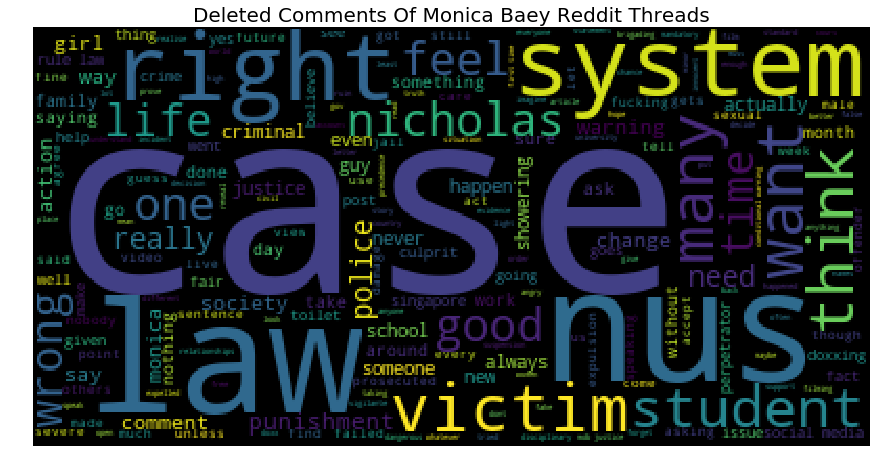

In [36]:
plt.figure(figsize=(15,8))

# create wordcloud here
desc_wordcloud = WordCloud().generate(content_deleted_final)

plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Deleted Comments Of Monica Baey Reddit Threads", fontsize=20)
plt.show()

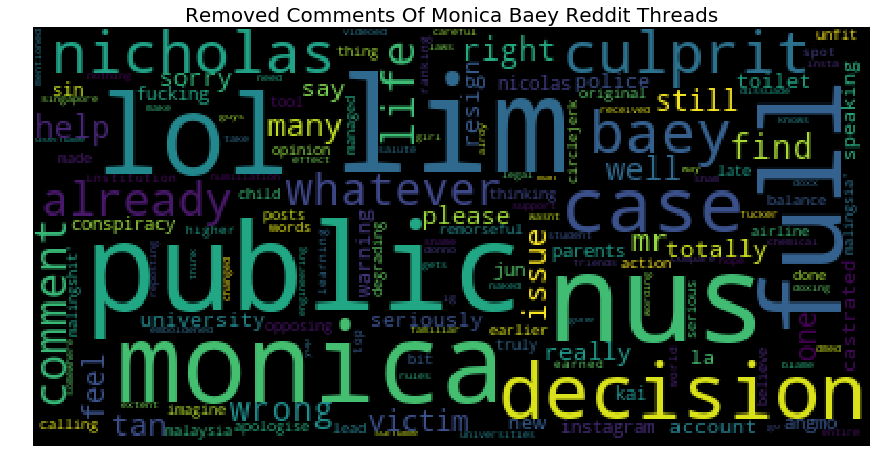

In [35]:
plt.figure(figsize=(15,8))

# create wordcloud here
desc_wordcloud = WordCloud().generate(content_removed_final)

plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Removed Comments Of Monica Baey Reddit Threads", fontsize=20)
plt.show()

### Insight
Firstly and foremost, everything on internet is permanent. Despite the user having deleted theie comment, enough server are running online to keep the data intact. Secondly, it would be the fact that comments with high votes do not reflect the actualy sentiment of the comment i.e, a toxic comment could still be rated very high. 

### Evaluation 
Through, web-Scraping we were able to dig out all the comments that are not visible to a regular user and check viablitiy and reasons as in why there were removed from the website. The expected outcome was that negative comments would have been voted down and would be removed thereafter or use of certain words would cause the filtering bots to mark and remove those comments. However, the results were quite the contrary. By using emotional sentiment, we are able to say that comments were deleted or even removed even if they were seemingly postive sentiments.   